In [1]:
import os
import pandas as pd
from tqdm import tqdm

In [2]:
os.getcwd()

'/shared/ifbstor1/projects/mycovirus/script'

In [3]:
#for file in `find . -type f | grep -v "summary"`; do base=$(basename "$file");filename="${base%%.bam.txt}";cat $filename.bam.txt | cut -f1,7 > ../counts_2/$filename.csv; done;

In [4]:
def data_process(souche):
    df = pd.read_csv(f'../results/counts_2/{souche}.csv', sep='\t')
    df.rename(columns={df.columns[0]:'count'}, inplace=True)
    df.drop(df.iloc[0].name, inplace=True)
    df.to_csv(f'../results/counts_3/{souche}.csv')

In [5]:
myfiles=[i.split('.')[0] for i in os.listdir('../results/counts_2')]

In [6]:
len(myfiles)

91

In [7]:
for souche in tqdm(myfiles):
    data_process(souche)

100%|██████████| 91/91 [00:05<00:00, 17.29it/s]


In [8]:
l=[i for i in os.listdir('../results/counts_3') if i.endswith('.csv')]
len(l)

91

In [9]:
df1 = pd.read_csv('../results/counts_3/77_33_1_S10_L002_R1_001+p.csv')
df1.rename(columns={'Unnamed: 0':'gene_id'}, inplace=True)
matrix = pd.DataFrame(df1['gene_id'])

In [10]:
names = [i.split('.')[0] for i in l]

In [11]:
for filename in tqdm(l):
    df = pd.read_csv(f'../results/counts_3/{filename}')
    df.rename(columns={'Unnamed: 0':'gene_id'}, inplace=True)
    matrix = pd.merge(matrix, df, on='gene_id')

  1%|          | 1/91 [00:00<00:09,  9.46it/s]/shared/software/miniconda/envs/python-pytorch-tensorflow-3.7-1.11.0-2.6.0/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'count_x'} in the result is deprecated and will raise a MergeError in a future version.
  after removing the cwd from sys.path.
100%|██████████| 91/91 [00:02<00:00, 36.35it/s]


In [12]:
matrix.set_index('gene_id', inplace=True)

In [13]:
matrix.columns = names

In [14]:
matrix.head()

,77_33_1_S10_L002_R1_001+p,65_13_2_S12_L002_R1_001+p,12_49_1_S35_R1_001+p,12_37_2_S22_L002_R1_001+p,13_27_1_S36_R1_001+p,08_21_1_S8_L002_R1_001+p,14_17_1_S32_R1_001+p,77_73_1_S35_L002_R1_001+p,13_25_1_S32_L002_R1_001+p,61_61_2_S24_L002_R1_001+p,...,56_06_2_S21_L002_R1_001+p,79_06_1_S42_L002_R1_001+p,67_57_1_S16_L002_R1_001+p,62_41_1_S16_R1_001+p,78_78_2_S28_R1_001+p,69_06_1_S23_R1_001+p,71_08_1_S29_L002_R1_001+p,13_01_1_S37_L002_R1_001+p,13_34_2_S38_L002_R1_001+p,12_63_2_S30_R1_001+p
gene_id,,,,,,,,,,,,,,,,,,,,,
gene:AFUA_1G00100,0,0,2,0,0,0,0,0,0,0,...,0,0,0,2,1,4,0,0,0,0
gene:AFUA_1G00110,7,1,28,0,7,0,18,2,0,3,...,0,0,2,11,8,18,0,2,0,19
gene:AFUA_1G00120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
gene:AFUA_1G00130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
gene:AFUA_1G00150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#matrix.to_csv('../results/counts_matrix.csv')

In [16]:
clin = pd.read_csv('../rnaseq_metadata.csv', sep=';')

In [17]:
clin['sampleID']=[f'souche_{i}' for i in clin['sampleID']]

In [18]:
clin.head()

,sampleID,group,condition,mycovirus,azoleR
0,souche_12_37,env,virusfree,NaN,yes
1,souche_14_54,env,virusfree,NaN,yes
2,souche_69_17,api,virusfree,NaN,yes
3,souche_79_06,col,virusfree,NaN,yes
4,souche_07_24,env,infected,RNAvirus1,no


In [19]:
matrix.columns=['_'.join(i.split('_')[:2]).strip() for i in matrix.columns]
matrix.rename(columns={'af293_1':'af293'}, inplace=True)

In [20]:
matrix = matrix.T.reset_index().rename(columns={'index':'sampleID'})

In [21]:
matrix.index.name = None

In [22]:
matrix['sampleID']=[f'souche_{i}' for i in matrix['sampleID']]

In [23]:
matrix.head()

gene_id,sampleID,gene:AFUA_1G00100,gene:AFUA_1G00110,gene:AFUA_1G00120,gene:AFUA_1G00130,gene:AFUA_1G00150,gene:AFUA_1G00160,gene:AFUA_1G00170,gene:AFUA_1G00180,gene:AFUA_1G00200,...,gene:AFUA_8G07310,gene:AFUA_8G07320,gene:AFUA_8G07330,gene:AFUA_8G07340,gene:AFUA_8G07350,gene:AFUA_8G07360,gene:AFUA_8G07370,gene:AFUA_8G07380,gene:AFUA_8G07390,gene:AFUA_8G07400
0,souche_77_33,0,7,0,0,0,0,0,0,0,...,0,7,3,35,0,4,0,8,2,0
1,souche_65_13,0,1,0,0,0,1,0,0,27,...,0,12,4,28,0,3,3,4,6,0
2,souche_12_49,2,28,0,0,0,18,88,6,312,...,12,120,132,304,4,84,2,67,0,0
3,souche_12_37,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
4,souche_13_27,0,7,0,0,0,0,0,0,0,...,11,312,335,889,15,148,2,73,2,0


In [24]:
merge=pd.merge(clin, matrix, on='sampleID')

In [25]:
merge.set_index('sampleID', inplace=True)

In [26]:
colData = merge.iloc[:, :4]
counts = merge.iloc[:, 4:]

In [27]:
counts=counts.T

In [28]:
print(
    colData.shape,
    counts.shape
)

(91, 4) (9859, 91)


In [29]:
os.getcwd()

'/shared/ifbstor1/projects/mycovirus/script'

In [32]:
colData.reset_index(inplace=True)

In [34]:
colData[colData['sampleID']=='souche_12_20']

,sampleID,group,condition,mycovirus,azoleR
14,souche_12_20,env,virusfree,NaN,no


In [224]:
counts.to_csv('../results/counts_matrix.csv')
colData.to_csv('../results/colData.csv')

In [229]:
# NAN

In [237]:
import missingno as msno
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.pyplot as plt

labels= ['Mortgage', 'Utilities', 'Food', 'Gas']

colors=['blue', 'yellow', 'green', 'orange']

sizes= [1500, 600, 500, 300]

plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')

plt.axis('equal')

plt.show()


[30, 30, 30, 1]

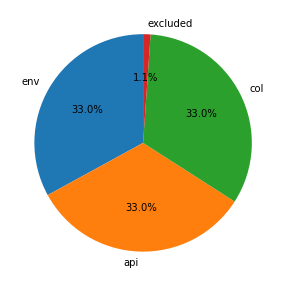

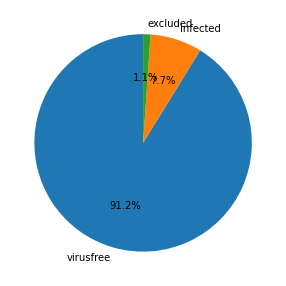

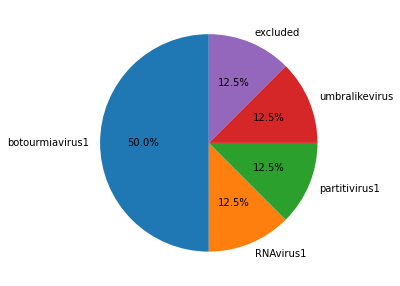

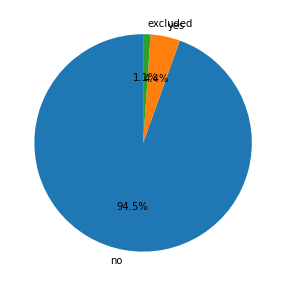

In [251]:
for col in colData:
    plt.figure(figsize=(5,5))
    labels = colData[col].value_counts().index.tolist()
    sizes = colData[col].value_counts().values.tolist()
    plt.pie(sizes, labels=labels, startangle=90, autopct='%1.1f%%')

<AxesSubplot:>

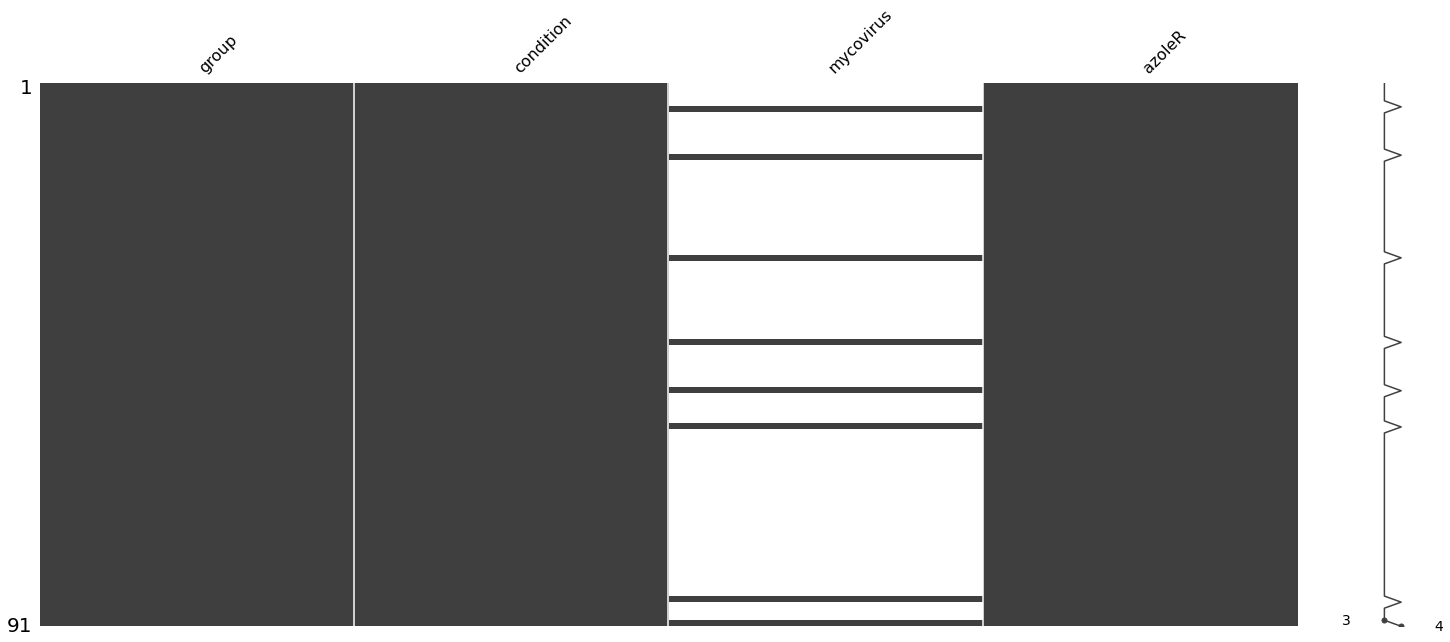

In [231]:
# Visualize missing values as a matrix
msno.matrix(colData)

In [252]:
colData

,group,condition,mycovirus,azoleR
sampleID,,,,
souche_12_37,env,virusfree,NaN,yes
souche_14_54,env,virusfree,NaN,yes
souche_69_17,api,virusfree,NaN,yes
souche_79_06,col,virusfree,NaN,yes
souche_07_24,env,infected,RNAvirus1,no
...,...,...,...,...
souche_77_73,col,infected,botourmiavirus1,no
souche_78_08,api,virusfree,NaN,no
souche_78_11,api,virusfree,NaN,no
